# K-Means Clustering

In this exercise, we will implement the K-means algorithm and use it for image compression. We will first start on an example 2D dataset and then we will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

The K-means algorithm is as follows:
- Initialize centroids
- k-means algorithm for each iteration:

--(step 1) cluster assignement step: assign each data point to the closest centroid.

--(step 2) move centroid step: compute means based on centroid assignments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [2]:
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

## Part 1: Find Closest Centroids

In [3]:
# findClosestCentroids() computes the controid memberships for every example,
# it returns the closet centroids
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros([m,])
    for i in range(m):
        sd = []
        for j in range(K):
            d = X[i,:] - centroids[j,:]
            sd.append(np.dot(d, d.T))
        ind = np.argmin(sd)
        idx[i] = int(ind)
    return idx

In [4]:
# select an initial set of sentroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
# find the closest centroids for the examples using the initial centroids
idx = findClosestCentroids(X,initial_centroids)
print('Closest centroids for the first 3 examples\n')
print(idx[0:3]+1)

Closest centroids for the first 3 examples

[1. 3. 2.]


## Part 2: Compute Means

In [5]:
# computeCentroids() returns the new controids by computing the means of the data points
# assigend to each centroid
def computeCentroids(X, idx, K):
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros([K, n])
    for i in range(K):
        C_i = None
        for j in range(m):
            X_j = X[j,:].reshape([1,n])
            if idx[j] == i:
                if C_i is not None:
                    C_i = np.append(C_i, X_j, 0)
                else:
                    C_i = X_j
        centroids[i,:] = np.mean(C_i, 0)
    return centroids

In [6]:
# compute means based on the closest centroids found in the previous part
centroids = computeCentroids(X,idx,K)
print('Centroids computed after initial finding of closest centroids: ')
print(centroids)

Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


# Part 3: K-Means Clustering

In [7]:
# runkMeans runs the K-Means algorithm on data matrix X, where each row of X is a single example
def runkMeans(X, initial_centroids, max_iters, plot_progress):
    m = X.shape[0]
    n = X.shape[1]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros([m,])
    # run K-means
    for i in range(max_iters):
        #print('k-means iteration {}'.format(i+1))
        # for each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        # given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
        #print(centroids)
    return centroids, idx

In [8]:
max_iters = 10
centroids, idx = runkMeans(X,initial_centroids,max_iters, False)

## Part 4: K-Means Clustering on Pixels

In this exercise, we will use K-Means to compress an image. To do this, we will first run K-Means on the colors of the pixels in the image and then we will map each pixel onto its closest centroid.

In [9]:
from scipy import misc
# load an image of a bird
A = misc.imread('bird_small.png')
# divide by 255 so that all values are in the range (0,1)
A = A/float(255)
# size of the image
img_size = A.shape
print(img_size)

(128L, 128L, 3L)


C:\Users\xyguo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# kMeansInitCentroids() initializes K centroids that are to be used in K-Means on the dataset X
def kMeansInitCentroids(X, K):
    centroids = np.zeros([K, X.shape[1]])
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    return centroids

In [11]:
# reshape the image into an N*3 matrix where N= number of pixels.
# each row will contain the red, green, and blue pixel values
X = A.reshape([img_size[0]*img_size[1], 3])
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)

In [12]:
# run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

## Part 5: Image Compression

In [13]:
# find the closest cluster members
idx = findClosestCentroids(X, centroids)

In [14]:
# we can now recover the image from the indices(idx) by mapping each pixel
# to the centroid value
X_recovered = centroids[[int(item) for item in idx],:]
X_recovered = X_recovered.reshape([img_size[0], img_size[1], img_size[2]])

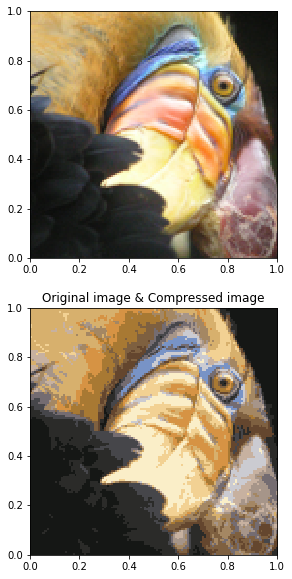

In [15]:
plt.figure(figsize = (10,10))
# display the original image
ax1=plt.subplot(2, 1, 1)
ax1.imshow(A, extent=[0, 1, 0, 1])
# display compressed image
ax2=plt.subplot(2, 1, 2)
ax2.imshow(X_recovered, extent=[0, 1, 0, 1])
plt.title('Original image & Compressed image')
plt.show()